# Modeling - Random Forest



What is it?
- a machine learning algorithm used for predicting categorical target variables
- Pipeline: Plan - Acquire - Prepare - Explore - **Model** - Deliver

Why do we care?
- we can predict future target variables based on the model we build! 

How does it work?
- [slides we already saw](https://docs.google.com/presentation/d/14alN-7mOuKKUEjbPxdUDRWXI3cfI51_T/edit?usp=sharing&ouid=110448495992573862737&rtpof=true&sd=true)

How do we use it?
- acquire, prepare, explore our data
- split data for modeling
- build models on train
    - create rules based on our input data
- evaluate models on train & validate
    - see how our rules work on unseen data
- pick best of the best model, and evaluate bestest model on test

## Show us!

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

import acquire
import prepare

## Example - Iris Dataset

See it in the data science pipeline!

### Acquire

In [2]:
#get my iris data
df = acquire.get_iris_data()

In [3]:
#look at it
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


### Prepare

In [4]:
#clean my data
train, validate, test = prepare.prep_iris(df)

In [5]:
#split my data
#train, validate, test = prepare.my_train_test_split(df, 'species')

In [6]:
#look at my train
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0
36,setosa,5.5,3.5,1.3,0.2,1,0,0
133,virginica,6.3,2.8,5.1,1.5,0,0,1
95,versicolor,5.7,3.0,4.2,1.2,0,1,0
18,setosa,5.7,3.8,1.7,0.3,1,0,0


### Explore

ONLY USING TRAIN!

completed the following steps on my features and target variable
1. hypothesize
2. visualize
3. analyze
4. summarize

these steps arent written out here, however, i found that petal width and petal length identified species the most

### Model

Before we put anything into our machine learning model, we will want to establish a baseline predication

#### Baseline

In [7]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0
36,setosa,5.5,3.5,1.3,0.2,1,0,0
133,virginica,6.3,2.8,5.1,1.5,0,0,1
95,versicolor,5.7,3.0,4.2,1.2,0,1,0
18,setosa,5.7,3.8,1.7,0.3,1,0,0


In [8]:
#find most common species
train.species.value_counts()

versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64

Since there is not a most common class, it doesn't matter which one we choose.  

In [9]:
#calculate baseline accuracy
baseline_accuracy = 30 / (30+30+30)
baseline_accuracy

0.3333333333333333

#### 0. split into features and target variable
- need to do this on my train, validate, and test dataframe
- will end up with the following variables:
    - X_train, X_validate, X_test: all the features we plan to put into our model
    - y_train, y_validate, y_test: the targete variable

In [10]:
#look at train
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0
36,setosa,5.5,3.5,1.3,0.2,1,0,0
133,virginica,6.3,2.8,5.1,1.5,0,0,1
95,versicolor,5.7,3.0,4.2,1.2,0,1,0
18,setosa,5.7,3.8,1.7,0.3,1,0,0


For my first iteration, im going to send all possible features into my model

In [11]:
#set all my features as my X_train
X_train = train.drop(columns=['species', 'setosa', 'versicolor', 'virginica'])
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
79,5.7,2.6,3.5,1.0
36,5.5,3.5,1.3,0.2
133,6.3,2.8,5.1,1.5
95,5.7,3.0,4.2,1.2
18,5.7,3.8,1.7,0.3


In [12]:
#repeat for validate and test
X_validate = validate.drop(columns=['species', 'setosa', 'versicolor', 'virginica'])
X_test = test.drop(columns=['species', 'setosa', 'versicolor', 'virginica'])

In [13]:
#set target
target = 'species'

In [14]:
#notice im sending in a single column name
y_train = train[target]
y_train.head()

79     versicolor
36         setosa
133     virginica
95     versicolor
18         setosa
Name: species, dtype: object

In [15]:
#repeat for validate and test
y_validate = validate[target]
y_test = test[target]

Note: our X variables are dataframes, our y variables are series

#### 1. make the object

In [16]:
#new import!
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf = RandomForestClassifier()
rf

RandomForestClassifier()

#### 2. fit the object

In [18]:
#building our model on our train values
rf.fit(X_train, y_train)

RandomForestClassifier()

#### 3. transform the object

In [19]:
#score on my train data
rf.score(X_train, y_train)

1.0

#### how does our model work on unseen data?

In [20]:
#score on validate
rf.score(X_validate, y_validate)

0.9722222222222222

#### feature importance

In [21]:
rf.feature_importances_

array([0.10344258, 0.03643101, 0.46052715, 0.39959926])

In [22]:
X_train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

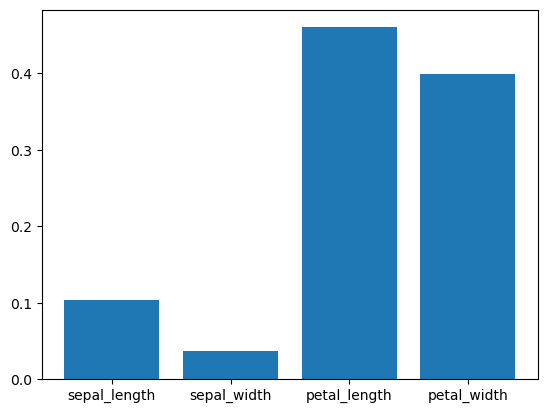

In [23]:
plt.bar(X_train.columns, rf.feature_importances_);

### change a hyperparameter

random forest hyperparameters
- n_estimators: The number of trees in the forest (default=100)
- bootstrap: whether bootstrap samples are used when building trees (default=True)
- random_state: controls randomness of bootstrapping samples (default=None)

seen before
- criterion (default=”gini”)
- max_depth (default=None)
- min_samples_split (default=2)
- min_samples_leaf (default=1)
- max_leaf_nodes (default= None)

#### 1. create the object

this is when you set your hyperparameter

In [24]:
#set max depth & random_state
trees = RandomForestClassifier(random_state=123, max_depth=3)
trees

RandomForestClassifier(max_depth=3, random_state=123)

#### 2. fit the object

In [25]:
#still using train data
trees.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=123)

#### 3. transform the object

In [26]:
#evaluate on train
trees.score(X_train, y_train)

0.9761904761904762

In [27]:
#see predictions
trees.predict(X_train)[:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

In [41]:
#see probability of predictions 
trees.predict_proba(X_train)

array([[9.67741935e-04, 9.87061807e-01, 1.19704511e-02],
       [9.60967742e-01, 3.63936026e-02, 2.63865546e-03],
       [0.00000000e+00, 3.35430165e-01, 6.64569835e-01],
       [9.67741935e-04, 9.87061807e-01, 1.19704511e-02],
       [9.90967742e-01, 9.03225806e-03, 0.00000000e+00],
       [0.00000000e+00, 7.22624432e-03, 9.92773756e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.35456888e-02, 9.66454311e-01],
       [9.67741935e-04, 9.80839585e-01, 1.81926733e-02],
       [0.00000000e+00, 5.55957765e-03, 9.94440422e-01],
       [0.00000000e+00, 1.63929110e-02, 9.83607089e-01],
       [9.67741935e-04, 9.87061807e-01, 1.19704511e-02],
       [0.00000000e+00, 3.38576174e-01, 6.61423826e-01],
       [0.00000000e+00, 1.56567020e-01, 8.43432980e-01],
       [9.90967742e-01, 9.03225806e-03, 0.00000000e+00],
       [0.00000000e+00, 5.99335

#### more evaluation

In [33]:
#y_pred
y_pred = trees.predict(X_train)
y_pred[:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

In [34]:
#generate confusion matrix!
conf = confusion_matrix(y_train, y_pred)
conf

array([[28,  0,  0],
       [ 0, 26,  2],
       [ 0,  0, 28]])

In [35]:
#find labels in our dataset & sort
labels = sorted(y_train.unique())
labels

['setosa', 'versicolor', 'virginica']

In [36]:
#make pretty with df
pd.DataFrame(conf,
            index=[label + '_actual'for label in labels],
            columns=[label + '_predict'for label in labels])

,setosa_predict,versicolor_predict,virginica_predict
setosa_actual,28,0,0
versicolor_actual,0,26,2
virginica_actual,0,0,28


In [37]:
#generate classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       1.00      0.93      0.96        28
   virginica       0.93      1.00      0.97        28

    accuracy                           0.98        84
   macro avg       0.98      0.98      0.98        84
weighted avg       0.98      0.98      0.98        84



#### evaluate on unseen data

In [38]:
#score our validate
trees.score(X_validate, y_validate)

0.9722222222222222